# Capstone Project - The Battle of Neighborhoods

# IN SEARCH OF A CITY

# Table of contents
* [Introduction: Business Problem](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Analysis](#analysis)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)

# Introduction: Business Problem

This study focus towards the growth of the state and the city in United States. This will lead to the possibility of making an investment, in case if you are a Real estate Investor and you want to make an educated investment decision. Beforehand , you must understand the demography of that place, population information, its growth, Cost of living or real estate.

Populations are never static, they grow or decline because of various reasons- births, deaths or migration. In this study, we will learn about where the Millennials are migrating to, we will learn about the population and its growth and other attributes. 

We will implement Top down approach for the analysis in the given order: 
* shortlist the top 3 states and compare them on the cost of living parameters 
* shortlist Top five cities in the selected on the basis of avg. real estate list price
* Analyze the selected city based on Avg. Real estate List Price
* Study the city based on other demographic details
* Plot the city and segment the neighborhoods

Data Exploratory method has been adopted to understand the data. 

You can use this report as a tool to devise a strategy for making an investment or, expand a business and or if it's a fresh start up in the selected city. Hence the name is "In search of a city".

# Data Acquistion  

### Change in population for last decade 

In this stage, we will study change in population for last decade for states within the United States. In this data National Ranking has been listed by the US Census Buearu. I have downloaded the data from https://www.census.gov/data/tables/time-series/demo/popest/2010s-state-total.html, and read it through read_csv() in pandas. 


In [76]:
import pandas as pd
import numpy as np 


In [77]:
df_can = pd.read_csv('D:/Datasets/nst-est2019-02_imp.csv')
df_can.head()

,table with row headers in column A and column headers in rows 3 through 5. (leading dots indicate sub-parts),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,Table 2. Cumulative Estimates of Resident Popu...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,.Geographic Area,Population Estimate,NaN,"Change, 2010 to 2019",NaN,National Ranking of Regions and States,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,Population Estimate,NaN,"Change, 2010 to 2019",NaN,NaN
3,NaN,"April 1, 2010 Estimates Base","July 1, 2019",Number,Percent,"April 1, 2010 Estimates Base","July 1, 2019",Number,Percent,NaN
4,United States,"308,758,105","328,239,523","19,481,418",6.3,(X),(X),(X),(X),NaN


Lets upload the data again but differently this time

In [78]:
df_can = pd.read_csv('D:/Datasets/nst-est2019-02_imp.csv',
                    skiprows=range(9),
                     skipfooter=2)

print('Data downloaded and read into a dataframe!')

df_can.head()

Data downloaded and read into a dataframe!


<ipython-input-78-6530535881f5>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  df_can = pd.read_csv('D:/Datasets/nst-est2019-02_imp.csv',


,West,"71,946,907","78,347,268","6,400,361",8.9,2,2.1,2.2,2.3,Unnamed: 9
0,.Alabama,"4,780,125","4,903,185","123,060",2.6,23,24,25,34,NaN
1,.Alaska,"710,249","731,545","21,296",3.0,47,48,43,31,NaN
2,.Arizona,"6,392,288","7,278,717","886,429",13.9,16,14,7,8,NaN
3,.Arkansas,"2,916,031","3,017,804","101,773",3.5,32,33,31,29,NaN
4,.California,"37,254,519","39,512,223","2,257,704",6.1,1,1,3,21,NaN


In [79]:
df_can.columns

Index(['West', '71,946,907', '78,347,268', '6,400,361', '8.9', '2', '2.1',
       '2.2', '2.3', 'Unnamed: 9'],
      dtype='object')

### Data Wrangling: 

 In this step we will do data processing.Lets rename the columns first

In [80]:
df_can.rename(columns={'West':'Population Estimate','71,946,907':'July 1, 2019','78,347,268':'Change, 2010 to 2019-Number','6,400,361':'Change, 2010 to 2019-Number Percent','8.9':'National Ranking of Regions and States-Population Estimate(april 1 2010)','2':'National Ranking of Regions and States-Population Estimate(July 1, 2019)','2.1':'National Ranking of Regions and States-Change, 2010 to 2019-Number','2.2':'National Ranking of Regions and States-Change, 2010 to 2019-percent'}, inplace=True)
df_can.head(5)

,Population Estimate,"July 1, 2019","Change, 2010 to 2019-Number","Change, 2010 to 2019-Number Percent",National Ranking of Regions and States-Population Estimate(april 1 2010),"National Ranking of Regions and States-Population Estimate(July 1, 2019)","National Ranking of Regions and States-Change, 2010 to 2019-Number","National Ranking of Regions and States-Change, 2010 to 2019-percent",2.3,Unnamed: 9
0,.Alabama,"4,780,125","4,903,185","123,060",2.6,23,24,25,34,NaN
1,.Alaska,"710,249","731,545","21,296",3.0,47,48,43,31,NaN
2,.Arizona,"6,392,288","7,278,717","886,429",13.9,16,14,7,8,NaN
3,.Arkansas,"2,916,031","3,017,804","101,773",3.5,32,33,31,29,NaN
4,.California,"37,254,519","39,512,223","2,257,704",6.1,1,1,3,21,NaN


Remove the columns, and created new dataframe with by fetching two columns derived from the above dataset, so that I can use it for plotting . 

In [81]:
data=df_can[["Population Estimate", "National Ranking of Regions and States-Change, 2010 to 2019-Number"]]
#newdf1.set_index("States")
data['Population Estimate']=data['Population Estimate'].str.strip('.')


data.head()

<ipython-input-81-6969fff2107d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Population Estimate']=data['Population Estimate'].str.strip('.')


,Population Estimate,"National Ranking of Regions and States-Change, 2010 to 2019-Number"
0,Alabama,24
1,Alaska,48
2,Arizona,14
3,Arkansas,33
4,California,1


Sort the data by the column to get the top 3 states for the net rate change of population.

In [82]:
data=data.drop(index=[51,52,53,54,55,56,57])


In [83]:
data.sort_values(by=["National Ranking of Regions and States-Change, 2010 to 2019-Number"],
                axis=0,
                ascending=True)
data.head()

,Population Estimate,"National Ranking of Regions and States-Change, 2010 to 2019-Number"
0,Alabama,24
1,Alaska,48
2,Arizona,14
3,Arkansas,33
4,California,1


In [84]:
top3=data["National Ranking of Regions and States-Change, 2010 to 2019-Number"].astype(int)<4
top3.head()

0    False
1    False
2    False
3    False
4     True
Name: National Ranking of Regions and States-Change, 2010 to 2019-Number, dtype: bool

In [85]:
new=data[top3]
new.sort_values(by=["National Ranking of Regions and States-Change, 2010 to 2019-Number"],
                axis=0,
                ascending=True)

,Population Estimate,"National Ranking of Regions and States-Change, 2010 to 2019-Number"
4,California,1
43,Texas,2
9,Florida,3


The result above shows the top 3 states ranked for change in poulation for last decade. 

# Comparison of California versus Texas - Cost of Living 

As per the US census report for inbound Migration  the rate of net migration to Texas in 2019 is 6.62%. The cost of living in California varies significantly from Texas. That said, the average Californian faces higher costs of living than the average Texan.

The data is scraped from https://www.bestplaces.net/cost-of-living/dallas-tx/los-angeles-ca/65000 that shares the insight on cost of living in California versus Texas. This data provides you the visibility that Texas is a good option over the California for the expansion of the business, or laying the foundation of a new business or making some investments as a Real Estate Investor. 



In [86]:
df2=pd.read_csv('D:/Datasets/comparison.csv')
df2

,Cost of Living Indexes,Texas,California,Difference
0,"Homeowner, No Child care, Taxes Not Considered",101.6,173.3,70.6% more
1,Food & Groceries,99.1,104.1,5.0% more
2,Housing,92.9,298.2,221.0% more
3,Median Home cost,214700.0,689500.0,474800
4,Utilities,100.0,93.7,6.3 % less
5,Transportaion,117.1,165.3,41.2% more
6,Health,94.0,89.4,4.9% less
7,Miscellaneous,105.2,104.5,0.7% less


# Methodology 




* Top five cities in Texas based upon real estate list price
* Analyze the city based on Avg Real estat List Price
* Study the city based on other demographic details
* Plot the city and segment the neighborhoods

Data Exploratory method has been adopted to understand the data. 


Import Matplotlib and Numpy. 

In [87]:
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot')

# Top Five cities in Texas

As per the website:  https://www.businessinsider.com/texas-cities-everyone-is-moving-to-2019-11 the top five Texas cities/metropolitan areas on the list were Austin-Round Rock, Midland, San Antonio-New Braunfels, Dallas-Fort Worth-Arlington, and Houston-The Woodlands-Sugar Land. 

I captured some data for you about the real estate's average list price for top 5 cities mentioned above.


In [88]:
df3 = pd.read_csv("C:/Users/nites/OneDrive/Documents/DataScience/Datasets/top_cities.csv")
df3.head()

,City,Avg Real esate price
0,Houston,410268.5
1,Austin,542957.9
2,Dallas,542766.8
3,San Antonio,542931.7
4,Midland,540907.9


Lets make the city column as  an index of the dataframe and plot the data .  

In [89]:
df3.set_index('City', inplace= True)

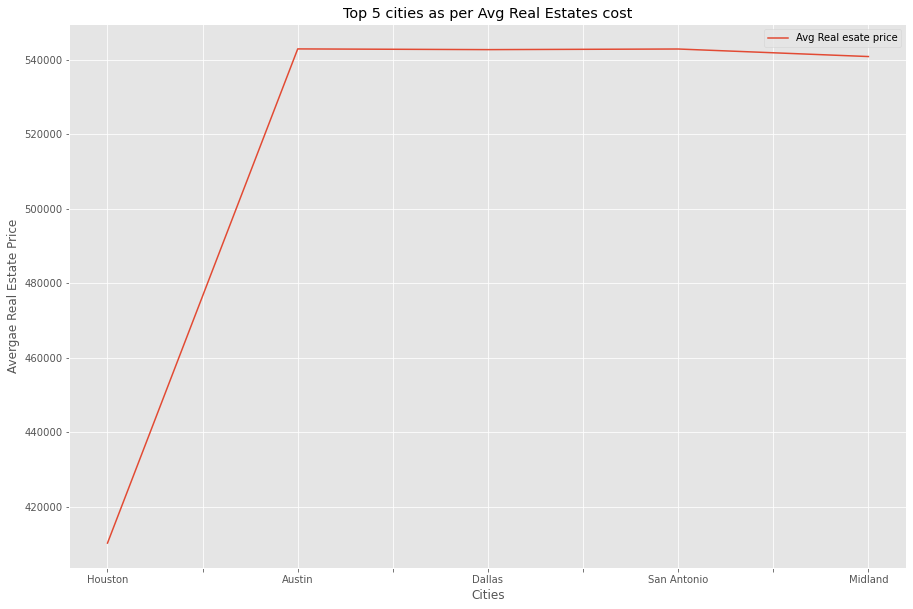

In [90]:
df3.plot(kind='line', 
             #alpha=0.25
             stacked=False,
             figsize=(15, 10), # pass a tuple (x, y) size
             )

plt.title('Top 5 cities as per Avg Real Estates cost')
plt.ylabel('Avergae Real Estate Price')
plt.xlabel('Cities')

plt.show()

This analysis shows that Houston is on the lower side on the scale of Average Real estate Price. Hence can be considered as a city that you were looking for in terms of making an investment.

# Analysis on Houston city

Lets upload the data that shows the avg list price of Houston city's real estate based upon its location coordinates and postal codes. I have done the extrenal search for coordinates to make the data accurate for analysis using google tool. 

In [324]:
file6= "C:/Users/nites/OneDrive/Documents/DataScience/Datasets/Houston_Latest.csv"
new_data=pd.read_csv(file6,engine='python')
new_data.head()

,Zip,City,State,Latitude,Longitude,avListprice
0,77000,Houston,TX,29.711,-95.305,262604
1,77001,Houston,TX,29.813,-95.31,229613
2,77002,Houston,TX,29.755,-95.366,374565
3,77003,Houston,TX,29.749,-95.347,387403
4,77004,Houston,TX,29.729,-95.366,452948


In [92]:
lp=new_data['avListprice']>1000

In [93]:
ne_lp=new_data[lp]
ne_lp.sort_values(by=["avListprice"],
                axis=0,
                ascending=False)
ne_lp['avListprice'].min()

136509

In [94]:
ne_lp['avListprice'].max()

1990714

In [95]:
np.median(ne_lp['avListprice'])

291772.0

The above data is the sorted data for avergae list price of the Real estates as per the postal codes. The maximum  average list price is 1990714 dollars and the minimum is 136509 dollars. The median range is 291772. This data gives you an estimate of the real estate properties as per the postal codes based on data provided for Houston.  

# Analysis by Postal code and other attributes

In the next steps we will analyze the attributes like population, growth , age , Income per household as per the postal code of Houston City- which in return give us the infomation and insight about the neighborhoods.
Lets upload the data !!

In [96]:
file3= "C:/Users/nites/OneDrive/Documents/DataScience/Datasets/Houston_Population.csv"
df_pop=pd.read_csv(file3)
df_pop.head()

,Zip,Population,Growth,Age,Income per household,City
0,77002,4303,-2.90,33.4,35588,Houston
1,77003,9801,-0.07,31.8,19252,Houston
2,77004,30798,-0.06,29.4,20840,Houston
3,77005,23252,-0.09,38.7,104035,Houston
4,77006,21385,0.08,35.5,41746,Houston


In [97]:
df_pop.set_index('Zip', inplace= True)

In [98]:
df_pop.head()

,Population,Growth,Age,Income per household,City
Zip,,,,,
77002,4303,-2.90,33.4,35588,Houston
77003,9801,-0.07,31.8,19252,Houston
77004,30798,-0.06,29.4,20840,Houston
77005,23252,-0.09,38.7,104035,Houston
77006,21385,0.08,35.5,41746,Houston


 The above information describes the data about the average Income Household of the city: $45000 

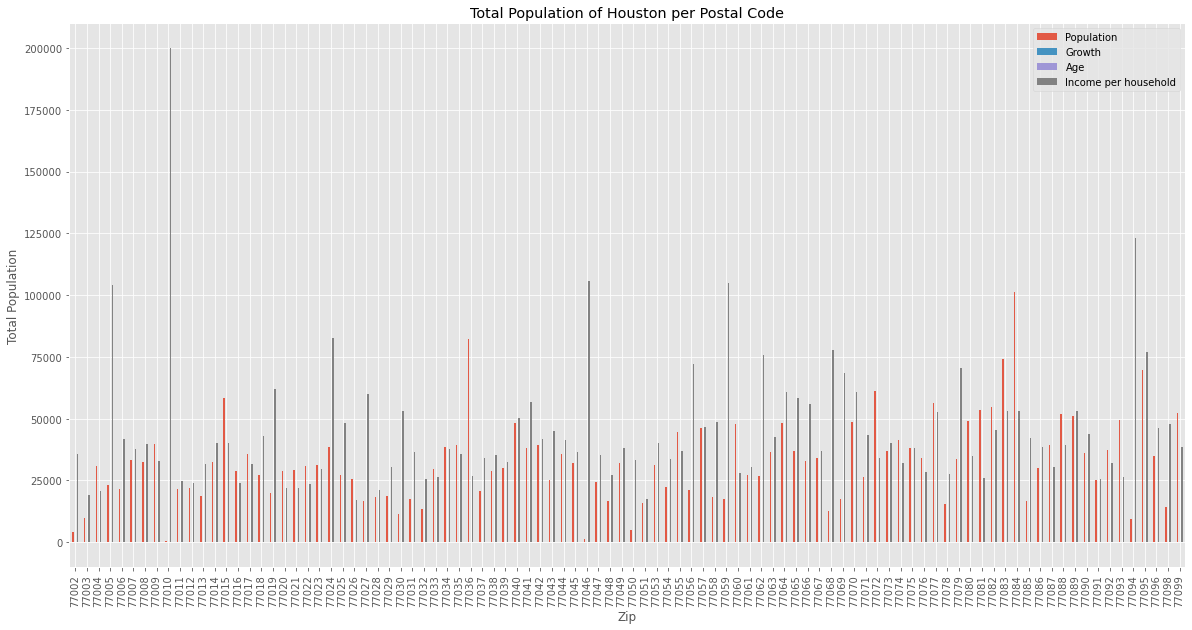

In [99]:
df_pop.plot(kind='bar',
            alpha=0.90,
            stacked=False,
            figsize=(20,10))
plt.title('Total Population of Houston per Postal Code')
plt.xlabel('Zip')
plt.ylabel('Total Population')
plt.show()

This plot provides a fair understanding on the growth of poulation and income per house hold as per the postal codes.
    
    

Lets study the Income house hold and age distribution in more detail below: 

In [100]:
df_pop.describe()

,Population,Growth,Age,Income per household
count,96.000000,96.000000,96.000000,96.000000
mean,32436.968750,0.037708,32.828125,44838.197917
std,16898.722102,0.307648,4.387151,25593.240875
min,618.000000,-2.900000,26.000000,17183.000000
25%,21087.250000,0.040000,29.500000,30416.500000
50%,31116.500000,0.060000,32.200000,38320.500000
75%,39182.000000,0.090000,34.750000,50804.000000
max,101233.000000,0.400000,45.700000,200000.000000


In [101]:
df_iph['Income per household'].mean()

NameError: name 'df_iph' is not defined

As per the data listed above,the average Income Household of the city is 45000 dollars and above analysis also shows the postal codes where  the income household is above 100000 dollars. 

# Analysis about the millenials moving to Texas

The early pioneers who traversed the California Trail to achieve wealth during the California Gold Rush in the mid-1800s are a prominent example of this.People are fleeing cities beacuse of varous reasons- jobs, hosuing, low tax etc. In this analysis, the median age group will be reflected to show the age distribution in city- Houston.

In [ ]:
age=df_pop.copy()
df_age=age.reset_index()
df_age.head()

In [102]:
df_age['Age']=df_age['Age'].astype(int)

In [103]:
new_age=df_age[['Zip','Age']] 
new_age.head()

,Zip,Age
0,77002,33
1,77003,31
2,77004,29
3,77005,38
4,77006,35


In [104]:
new_age.set_index('Zip')

new_age.head()

,Zip,Age
0,77002,33
1,77003,31
2,77004,29
3,77005,38
4,77006,35


In [105]:

groups=new_age.groupby(by='Age')
groups


In [106]:
g=groups.count()


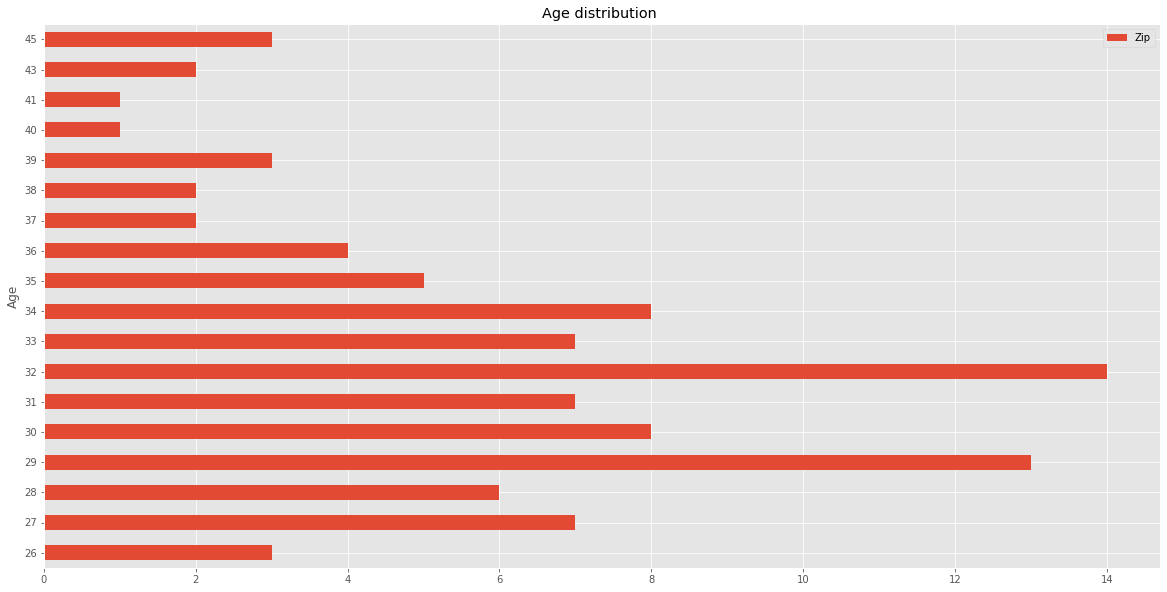

In [107]:

g.plot(kind='barh', figsize=(20,10))

plt.title('Age distribution ')

plt.ylabel('Age')

plt.show()



The above analysis shows the median age group in Houston is around 32 and the maximum population is in the age bracket of (27-34), and this age group is generally called as Millenials.

Millennials are playing an increasingly important role in local economics – as companies look for young talent in areas such as software development, cybersecurity, marketing and finance. It’s a generation that is inclined to move more. This can put the Houston area one of the markets for millennial homebuyers.

# Plot the map of Houston

Lets use Geocoder Python package,and Nominatim- (a geocoding software for Open Street Maps ). You know that Geopy can only make requests to Nominatim and using Nominatim. We need to establish a connection to APIs by setting up the geocoder.Lets import the geocoder and initiate it .

In [108]:
import folium 
import matplotlib.cm as cm
import matplotlib.colors as colors
import geopy
from geopy.geocoders import Nominatim 

Lets assume that you are the locator and your name is "The Flash" who will guide us through this process

In [109]:
locator= Nominatim(user_agent='The Flash')
geopy.geocoders.options.default_user_agent='The Flash'
geolocator=Nominatim()

Lets take an example- Postal code=77002

In [110]:
city='Houston'
Zip='77002'
state='Texas'
country='United States'
locate=geolocator.geocode(city+','+Zip+','+state+','+country)
print("latitude is :", locate.latitude,"\nlongitude is : ",locate.longitude)

latitude is : 29.7589382 
longitude is :  -95.3676974


In [323]:
#latitude=locate.latitude
latitude=29.761526
#longitude=locate.longitude
longitude=-95.369376
location = geolocator.geocode("Houston, 77002, Texas")
print(location.address)


Houston, Harris County, Texas, United States


The result above shows the name of the county which in this case is Harris County. 

Lets begin importing dependencies required for plotting the map of Houston based on the above information.You can also impose the markers in the map for real estate pricing . 

In [112]:
map_Houston = folium.Map(location=[latitude, longitude], zoom_start=10)


Since you know that Markers are the items used for marking a location on a map and Folium gives a folium.Marker() class for plotting markers on a map. Hence, the houston map with the latitude and logitude markers describing the geography is displayed as below and when you click on the marker it will display the avg. list price of the real estate.

In [113]:
# instantiate a feature group for the incidents in the dataframe

#feature1=new_data['avListprice']
feature1 = folium.map.FeatureGroup()

# loop through the 100 crimes and add each to the incidents feature group
for lat, lng, in zip(new_data.Latitude, new_data.Longitude):
      feature1.add_child(
        folium.CircleMarker(
            [lat, lng],
            popup='<h3 style="color:green;">Avg List Price</h3>',
            tooltip='<strong>Click here</strong>',
            
            radius=5, # define how big you want the circle markers to be
            color='yellow',
            fill=False,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

# add pop-up text to each marker on the map
latitudes = list(new_data.Latitude)
longitudes = list(new_data.Longitude)
labels = list(new_data.avListprice)

for lat, lng, label in zip(latitudes, longitudes, labels):
    folium.Marker([lat, lng], popup=label).add_to(map_Houston)    
    
# add incidents to map
map_Houston.add_child(feature1)

# Houston Neighborhood Analysis Using FOUR Square API

In [114]:
CLIENT_ID='0BPX23VUCSLSEZUIXIG0LCUCP3EGY5WR3XUNYSDVC0S44UVC' # your Foursquare ID
CLIENT_SECRET='EGX1JRYRZA1JQGXTTJFSKMKDDI5XPI4VEYUJUVXYF0ECOQAE' # your Foursquare Secret
VERSION='20180604'
LIMIT=30
Radius=200


In [115]:
# defining Url 

LIMIT = 60 # limit of number of venues returned by Foursquare API

radius = 300 # define radius


# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude, 
    longitude, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=0BPX23VUCSLSEZUIXIG0LCUCP3EGY5WR3XUNYSDVC0S44UVC&client_secret=EGX1JRYRZA1JQGXTTJFSKMKDDI5XPI4VEYUJUVXYF0ECOQAE&v=20180604&ll=29.7589382,-95.3676974&radius=300&limit=60'

In [116]:
import json
import requests

results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5fe296009d303e30fe97f284'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': '$-$$$$', 'key': 'price'},
    {'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Downtown Houston',
  'headerFullLocation': 'Downtown Houston, Houston',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 37,
  'suggestedBounds': {'ne': {'lat': 29.761638202700002,
    'lng': -95.3645930398198},
   'sw': {'lat': 29.756238197299997, 'lng': -95.3708017601802}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4bd9ae2d2e6f0f47c9730b08',
       'name': 'Becks Prime',
       'location': {'address': '910 Travis St',
        'lat': 29.75818486875766,
        'lng': -95.36617176399422,
        'labeledLatLng

In [117]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [118]:
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe


venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]
nearby_venues

<ipython-input-118-fcdf6c67d6a6>:6: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  nearby_venues = json_normalize(venues) # flatten JSON


,name,categories,lat,lng
0,Becks Prime,Burger Joint,29.758185,-95.366172
1,Mango Tree Thai Bistro,Thai Restaurant,29.758251,-95.365387
2,City Hall Farmer's Market,Farmers Market,29.759164,-95.368446
3,Jason's Deli,Food Truck,29.757464,-95.365543
4,5411 Empanadas,Empanada Restaurant,29.758986,-95.368590
5,Treebeards - The Tunnel,Southern / Soul Food Restaurant,29.757903,-95.368972
6,Tranquility Park,Park,29.760053,-95.368068
7,Houstonian Lite,Gym,29.760524,-95.365728
8,Dimassi's Mediterranean Buffet,Mediterranean Restaurant,29.758283,-95.365915
9,Hyatt Regency Houston,Hotel,29.757049,-95.369460


Lets explore the neighborhoods in next analysis where you can find the most common venues 

# Explore Neighborhoods

Define a method which will return the list of venues in Houston. 

In [119]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Latitude', 
                  'Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [120]:
Houston_venues = getNearbyVenues(names=nearby_venues['name'],
                                   latitudes=nearby_venues['lat'],
                                   longitudes=nearby_venues['lng']
                                  )

Becks Prime
Mango Tree Thai Bistro
City Hall Farmer's Market
Jason's Deli
5411 Empanadas
Treebeards - The Tunnel
Tranquility Park
Houstonian Lite
Dimassi's Mediterranean Buffet
Hyatt Regency Houston
Hermann Square
Spindletop Restaurant at Hyatt Regency Houston
Starbucks
Wok & Roll
Chick-fil-A
Chick-fil-A
Brooklyn Meatball Company
Amille's Coffee Bar & Catering
Massa's
Treebeards - Pennzoil Place
Pappas Bar-B-Q
Cafe Basil
Jimmy John's
One Allen Center Food Court
Zero's Sandwich Shop
The Houston Club
Dunkin'
lobbibar At The Hyatt Regency Houston
Subway
Otto's BBQ and Hamburgers
Which Wich - Kinder Morgan Building
Starbucks
Einstein Bros Bagels
Wendy’s
Droubi Brothers Mediterrean
Post Oak Grill - Downtown
FedEx Office Print & Ship Center


In [121]:
print(Houston_venues.shape)
Houston_venues.head()

(1308, 7)


,Neighborhood,Latitude,Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Becks Prime,29.758185,-95.366172,Jason's Deli,29.757464,-95.365543,Food Truck
1,Becks Prime,29.758185,-95.366172,Mango Tree Thai Bistro,29.758251,-95.365387,Thai Restaurant
2,Becks Prime,29.758185,-95.366172,Bombay Pizza Co.,29.757700,-95.364586,Pizza Place
3,Becks Prime,29.758185,-95.366172,JW Marriott Houston Downtown,29.758332,-95.364059,Hotel
4,Becks Prime,29.758185,-95.366172,Finn Hall,29.758678,-95.363846,Food Court


Let's check how many venues were returned for each neighborhood

In [122]:
print('There are {} uniques categories.'.format(len(Houston_venues['Venue Category'].unique())))

There are 64 uniques categories.


In [123]:
Houston_venues.groupby('Neighborhood').count()

,Latitude,Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
5411 Empanadas,30,30,30,30,30,30
Amille's Coffee Bar & Catering,37,37,37,37,37,37
Becks Prime,56,56,56,56,56,56
Brooklyn Meatball Company,60,60,60,60,60,60
Cafe Basil,18,18,18,18,18,18
Chick-fil-A,79,79,79,79,79,79
City Hall Farmer's Market,31,31,31,31,31,31
Dimassi's Mediterranean Buffet,60,60,60,60,60,60
Droubi Brothers Mediterrean,18,18,18,18,18,18


# Let's do the grouping as per the  venue


In [124]:
Houston_venues.groupby('Venue').count()

,Neighborhood,Latitude,Longitude,Venue Latitude,Venue Longitude,Venue Category
Venue,,,,,,
5411 Empanadas,37,37,37,37,37,37
Abu Omar Halal,11,11,11,11,11,11
Alley Theatre,17,17,17,17,17,17
Aloft Houston Downtown,17,17,17,17,17,17
Amille's Coffee Bar & Catering,1,1,1,1,1,1
...,...,...,...,...,...,...
Wok & Roll,4,4,4,4,4,4
Wortham Theater Center,6,6,6,6,6,6
Zero's Sandwich Shop,1,1,1,1,1,1


# Analyze each Neighborhood

In [125]:

# one hot encoding
Houston_onehot = pd.get_dummies(Houston_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
Houston_onehot['Neighborhood'] = Houston_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [Houston_onehot.columns[-1]] + list(Houston_onehot.columns[:-1])
Houston_onehot = Houston_onehot[fixed_columns]

Houston_onehot.head()

,Neighborhood,American Restaurant,Aquarium,BBQ Joint,Bakery,Bank,Bar,Beer Bar,Beer Garden,Bistro,...,Supplement Shop,Sushi Restaurant,Taco Place,Thai Restaurant,Theater,Theme Park Ride / Attraction,Theme Restaurant,Vietnamese Restaurant,Whisky Bar,Wine Bar
0,Becks Prime,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Becks Prime,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,Becks Prime,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Becks Prime,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Becks Prime,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [126]:
Houston_grouped = Houston_onehot.groupby('Neighborhood').mean().reset_index()
Houston_grouped.head()

,Neighborhood,American Restaurant,Aquarium,BBQ Joint,Bakery,Bank,Bar,Beer Bar,Beer Garden,Bistro,...,Supplement Shop,Sushi Restaurant,Taco Place,Thai Restaurant,Theater,Theme Park Ride / Attraction,Theme Restaurant,Vietnamese Restaurant,Whisky Bar,Wine Bar
0,5411 Empanadas,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.033333,0.033333,0.033333,0.066667,0.0,0.033333,0.000000,0.000000,0.033333
1,Amille's Coffee Bar & Catering,0.000000,0.0,0.000000,0.0,0.000000,0.027027,0.027027,0.000000,0.000000,...,0.000000,0.027027,0.027027,0.027027,0.054054,0.0,0.000000,0.000000,0.000000,0.027027
2,Becks Prime,0.000000,0.0,0.000000,0.0,0.000000,0.071429,0.017857,0.000000,0.017857,...,0.017857,0.017857,0.035714,0.017857,0.017857,0.0,0.000000,0.017857,0.000000,0.000000
3,Brooklyn Meatball Company,0.016667,0.0,0.016667,0.0,0.000000,0.050000,0.016667,0.016667,0.000000,...,0.016667,0.000000,0.033333,0.016667,0.016667,0.0,0.000000,0.016667,0.016667,0.000000
4,Cafe Basil,0.000000,0.0,0.000000,0.0,0.055556,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.055556,0.055556,0.0,0.000000,0.000000,0.000000,0.000000


In [127]:
Houston_grouped.shape

(35, 65)

In [128]:
num_top_venues = 2

for hood in Houston_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = Houston_grouped[Houston_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----5411 Empanadas----
          venue  freq
0         Hotel   0.1
1  Burger Joint   0.1


----Amille's Coffee Bar & Catering----
          venue  freq
0         Hotel  0.16
1  Burger Joint  0.11


----Becks Prime----
          venue  freq
0         Hotel  0.12
1  Burger Joint  0.07


----Brooklyn Meatball Company----
          venue  freq
0         Hotel  0.13
1  Burger Joint  0.07


----Cafe Basil----
          venue  freq
0         Hotel  0.11
1  Burger Joint  0.11


----Chick-fil-A----
          venue  freq
0  Burger Joint  0.09
1         Hotel  0.06


----City Hall Farmer's Market----
          venue  freq
0  Burger Joint  0.13
1         Hotel  0.10


----Dimassi's Mediterranean Buffet----
          venue  freq
0         Hotel  0.12
1  Burger Joint  0.07


----Droubi Brothers Mediterrean----
          venue  freq
0  Burger Joint  0.11
1           Gym  0.11


----Dunkin'----
   venue  freq
0  Hotel  0.13
1    Bar  0.07


----Einstein Bros Bagels----
          venue  freq
0         

In [129]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [130]:
import numpy as np

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = Houston_grouped['Neighborhood']

for ind in np.arange(Houston_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Houston_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,5411 Empanadas,Burger Joint,Hotel,Theater,Concert Hall,Performing Arts Venue,Wine Bar,Fried Chicken Joint,Food Court,Gym,Farmers Market
1,Amille's Coffee Bar & Catering,Hotel,Burger Joint,Concert Hall,Theater,Performing Arts Venue,Wine Bar,Shopping Mall,Music Venue,Optical Shop,Italian Restaurant
2,Becks Prime,Hotel,Burger Joint,Bar,Taco Place,Pizza Place,Italian Restaurant,Southern / Soul Food Restaurant,Performing Arts Venue,Concert Hall,Food Truck
3,Brooklyn Meatball Company,Hotel,Burger Joint,Bar,Lounge,Italian Restaurant,Taco Place,Steakhouse,Food Truck,Southern / Soul Food Restaurant,Fast Food Restaurant
4,Cafe Basil,Hotel,Burger Joint,Gym,Performing Arts Venue,Concert Hall,Sandwich Place,Empanada Restaurant,Southern / Soul Food Restaurant,Farmers Market,Park


From the above analysis , we can see some most common venues as per the neighborhood. These are Hotels, Burger Joint, Theater Concert hall, coffee shops, parks etc. 

# Cluster Neighborhoods


Run k-means to cluster the neighborhood into 5 clusters. 

In [131]:
from sklearn.cluster import KMeans

# set number of clusters
kclusters = 5

Houston_grouped_clustering = Houston_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Houston_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([4, 4, 0, 0, 1, 2, 4, 0, 1, 0])

In [252]:
Houston_grouped.corr()

,American Restaurant,Aquarium,BBQ Joint,Bakery,Bank,Bar,Beer Bar,Beer Garden,Bistro,Burger Joint,...,Supplement Shop,Sushi Restaurant,Taco Place,Thai Restaurant,Theater,Theme Park Ride / Attraction,Theme Restaurant,Vietnamese Restaurant,Whisky Bar,Wine Bar
American Restaurant,1.000000,-0.061604,0.032303,-0.061604,-0.249103,0.596474,0.328360,0.061595,-0.177743,-0.444934,...,0.709079,-0.269098,0.330572,-0.440450,-0.394237,-0.061604,-0.142768,0.652110,1.000000,-0.245921
Aquarium,-0.061604,1.000000,0.339354,1.000000,-0.059251,-0.129438,0.156769,-0.084967,-0.084860,-0.212426,...,-0.085717,0.116712,-0.016165,-0.210285,0.079929,-0.029412,0.214765,0.311338,-0.061604,0.097454
BBQ Joint,0.032303,0.339354,1.000000,0.339354,-0.299090,0.200969,0.446630,0.908423,0.704896,-0.520795,...,0.264272,0.225855,0.180835,-0.603324,-0.048423,-0.092555,-0.095789,0.385464,0.032303,0.092594
Bakery,-0.061604,1.000000,0.339354,1.000000,-0.059251,-0.129438,0.156769,-0.084967,-0.084860,-0.212426,...,-0.085717,0.116712,-0.016165,-0.210285,0.079929,-0.029412,0.214765,0.311338,-0.061604,0.097454
Bank,-0.249103,-0.059251,-0.299090,-0.059251,1.000000,-0.629135,-0.602188,-0.290476,-0.292560,0.472449,...,-0.422147,-0.630913,-0.945992,0.835512,0.113584,-0.178609,-0.381123,-0.425939,-0.249103,-0.378805
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Theme Park Ride / Attraction,-0.061604,-0.029412,-0.092555,-0.029412,-0.178609,-0.129438,-0.140290,-0.084967,-0.084860,-0.238107,...,-0.085717,0.331251,0.136077,-0.048037,0.392772,1.000000,0.462327,-0.093319,-0.061604,0.285460
Theme Restaurant,-0.142768,0.214765,-0.095789,0.214765,-0.381123,-0.220142,-0.028781,-0.196911,-0.196665,-0.074281,...,-0.198649,0.705760,0.397173,-0.158152,0.480103,0.462327,1.000000,-0.105050,-0.142768,0.607297
Vietnamese Restaurant,0.652110,0.311338,0.385464,0.311338,-0.425939,0.743934,0.506341,0.269933,0.290025,-0.661632,...,0.920115,-0.007845,0.442829,-0.661621,-0.452229,-0.093319,-0.105050,1.000000,0.652110,-0.203600
Whisky Bar,1.000000,-0.061604,0.032303,-0.061604,-0.249103,0.596474,0.328360,0.061595,-0.177743,-0.444934,...,0.709079,-0.269098,0.330572,-0.440450,-0.394237,-0.061604,-0.142768,0.652110,1.000000,-0.245921


In [223]:
Houston_venues.head()

,Neighborhood,Latitude,Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Becks Prime,29.758185,-95.366172,Jason's Deli,29.757464,-95.365543,Food Truck
1,Becks Prime,29.758185,-95.366172,Mango Tree Thai Bistro,29.758251,-95.365387,Thai Restaurant
2,Becks Prime,29.758185,-95.366172,Bombay Pizza Co.,29.757700,-95.364586,Pizza Place
3,Becks Prime,29.758185,-95.366172,JW Marriott Houston Downtown,29.758332,-95.364059,Hotel
4,Becks Prime,29.758185,-95.366172,Finn Hall,29.758678,-95.363846,Food Court


In [156]:
#add clustering labels
#neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

Houston_merged = Houston_venues

# merge Houston_grouped with Houston_data to add latitude/longitude for each neighborhood
Houston_merged = Houston_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

Houston_merged.tail(50)# check the last columns!

,Neighborhood,Latitude,Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1258,Droubi Brothers Mediterrean,29.758102,-95.369951,Houstonian Lite,29.760524,-95.365728,Gym,1,Gym,Burger Joint,Fried Chicken Joint,Hotel,Food Truck,Japanese Restaurant,Farmers Market,Empanada Restaurant,Outdoors & Recreation,Park
1259,Droubi Brothers Mediterrean,29.758102,-95.369951,Chase Bank,29.756885,-95.373807,Bank,1,Gym,Burger Joint,Fried Chicken Joint,Hotel,Food Truck,Japanese Restaurant,Farmers Market,Empanada Restaurant,Outdoors & Recreation,Park
1260,Droubi Brothers Mediterrean,29.758102,-95.369951,Road Trippin,29.760506,-95.373986,Outdoors & Recreation,1,Gym,Burger Joint,Fried Chicken Joint,Hotel,Food Truck,Japanese Restaurant,Farmers Market,Empanada Restaurant,Outdoors & Recreation,Park
1261,Post Oak Grill - Downtown,29.757650,-95.368215,Jason's Deli,29.757464,-95.365543,Food Truck,4,Burger Joint,Hotel,Concert Hall,Performing Arts Venue,Park,Pizza Place,Food Truck,Empanada Restaurant,Seafood Restaurant,Shopping Mall
1262,Post Oak Grill - Downtown,29.757650,-95.368215,Becks Prime,29.758185,-95.366172,Burger Joint,4,Burger Joint,Hotel,Concert Hall,Performing Arts Venue,Park,Pizza Place,Food Truck,Empanada Restaurant,Seafood Restaurant,Shopping Mall
1263,Post Oak Grill - Downtown,29.757650,-95.368215,City Hall Farmer's Market,29.759164,-95.368446,Farmers Market,4,Burger Joint,Hotel,Concert Hall,Performing Arts Venue,Park,Pizza Place,Food Truck,Empanada Restaurant,Seafood Restaurant,Shopping Mall
1264,Post Oak Grill - Downtown,29.757650,-95.368215,Mango Tree Thai Bistro,29.758251,-95.365387,Thai Restaurant,4,Burger Joint,Hotel,Concert Hall,Performing Arts Venue,Park,Pizza Place,Food Truck,Empanada Restaurant,Seafood Restaurant,Shopping Mall
1265,Post Oak Grill - Downtown,29.757650,-95.368215,5411 Empanadas,29.758986,-95.368590,Empanada Restaurant,4,Burger Joint,Hotel,Concert Hall,Performing Arts Venue,Park,Pizza Place,Food Truck,Empanada Restaurant,Seafood Restaurant,Shopping Mall
1266,Post Oak Grill - Downtown,29.757650,-95.368215,Hyatt Regency Houston,29.757049,-95.369460,Hotel,4,Burger Joint,Hotel,Concert Hall,Performing Arts Venue,Park,Pizza Place,Food Truck,Empanada Restaurant,Seafood Restaurant,Shopping Mall
1267,Post Oak Grill - Downtown,29.757650,-95.368215,Treebeards - The Tunnel,29.757903,-95.368972,Southern / Soul Food Restaurant,4,Burger Joint,Hotel,Concert Hall,Performing Arts Venue,Park,Pizza Place,Food Truck,Empanada Restaurant,Seafood Restaurant,Shopping Mall


Total records found are 1307.
The 10 most comon venues have been listed in the neighborhood. Lets find out the number of first common venue in each cluster. A bar chart could be a good exmpale here to relay the information:

In [68]:
# create map
#from folium.plugins import FastMarkerCluster

map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Houston_merged['Latitude'], Houston_merged['Longitude'], Houston_merged['Neighborhood'],Houston_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

# Results

* National Ranking of states for Change in population(2010-2019)- 1. California 2. Texas 3. Florida
*Comparison of Cost of living(Texas versus California)- Texas is a good option over the California 
*Top five cities in Texas- Austin, Midland, San Antonio, Dallas, and Houston.
* Analyze the city based on Avg Real estate List Price- Houston was on the lower side on the scale of Avg. List Price 
* Study the city based on other demographic details-
**Age distribution-(27-34)
**Income per Household-Max- 200000 and avg Income per household is 45000
* Plot the city and segment the neighborhoods-The common venues in the neighborhoods are Hotels, Burger Joint, Theater Concert hall, coffee shops, parks etc. 


# Conclusions

This study was based upon a conclusion about a "city" and its neighborhood for the possibility of making an investment. We concluded that the Texas is one of the fastest growing states and Houston is among the top cities and is on the lower range of Avg Real estate price.

We learned that the avg Income per household is around 45000 dollars. The range of the listed real estate price in city Houston is( max- 1990714 dollars , minimum - 136509 and the median range is 291772).

Millennials are attracting to Texas and the age distribution of age group in Houston is(27-34).This is one of the factors for economic growth. This can put the Houston area one of the markets for millennial homebuyers.

We plotted the map of Houston and imposed the postal codes on that with the real estate price. This will provide you the insight on the geography of city - Houston


In this case the conecrt halls and Peforming arts venue comes under the 4th category of most common venues and let's assume that you have to open a Yoga center/Dance Academy , you will choose a location where you get the population of similar interests. This information can be drawn from the analysis of the neighborhoods. For Example, Harris County, in Houston can be such exmples of the locations. 

References: 
    *1. https://www.afire.org/summit/migrating-trends/
    *2. https://www.mpamag.com/commercial/how-migration-patterns-are-helping-cre-developers-238246.aspx
    *3. https://worldpopulationreview.com/us-cities/houston-tx-population 
    *4. https://www.businessinsider.com/texas-cities-everyone-is-moving-to-2019-11 
    *6. https://www.census.gov/data/tables/time-series/demo/popest/2010s-state-total.html
    *7. https://www.wikipedia.org
Tools:         
    *8. https://www.google.com
    *9. https://www.stackoverflow.com
        